<a href="https://colab.research.google.com/github/GiulioAppetito/AMOD_Project_2021_22/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [49]:
def graficoTempo(title, fileURL):
  intervals1 = []
  sample_means1 = []
  x = []
  y_gurobi = []
  y_bnb = []
  url = fileURL

  gurobiColor =  "#1a759f"
  bnbColor ="#fb8500"
  limitColor = "#f21b3f"

  df = pd.read_csv(url)
  df = df.sort_values(by=['jobs'])
  df.drop_duplicates(subset="jobs",keep='last', inplace=True)

  for i in df.index:
    x.append(df.loc[i,"jobs"])
    y_gurobi.append(df.loc[i,"gurobiTime"])
    y_bnb.append(df.loc[i,"bnbTime"])
  
  # plotting graph
  fig, ax = plt.subplots(1,figsize=(20,10))
  #fig.suptitle('Vertically stacked subplots')

  ax.plot(x, y_gurobi, label = "Gurobi", color = gurobiColor)
  ax.errorbar(x, y_gurobi, fmt ='o')
  ax.set_title(title)
  ax.set_xlabel('jobs')
  ax.set_ylabel('sec')
  ax.set_xlim(min(df['jobs']), max(df['jobs']))
  plt.xticks(range(min(df['jobs']), max(df['jobs']),5))


  ax.plot(x, y_bnb, label = "Branch & Bound",color = bnbColor)
  ax.errorbar(x, y_bnb, fmt ='o')
  ax.axhline(y = 60, label='Time limit',color = limitColor)

  plt.legend(loc="upper left")

  #ax.set_title('k = 64')

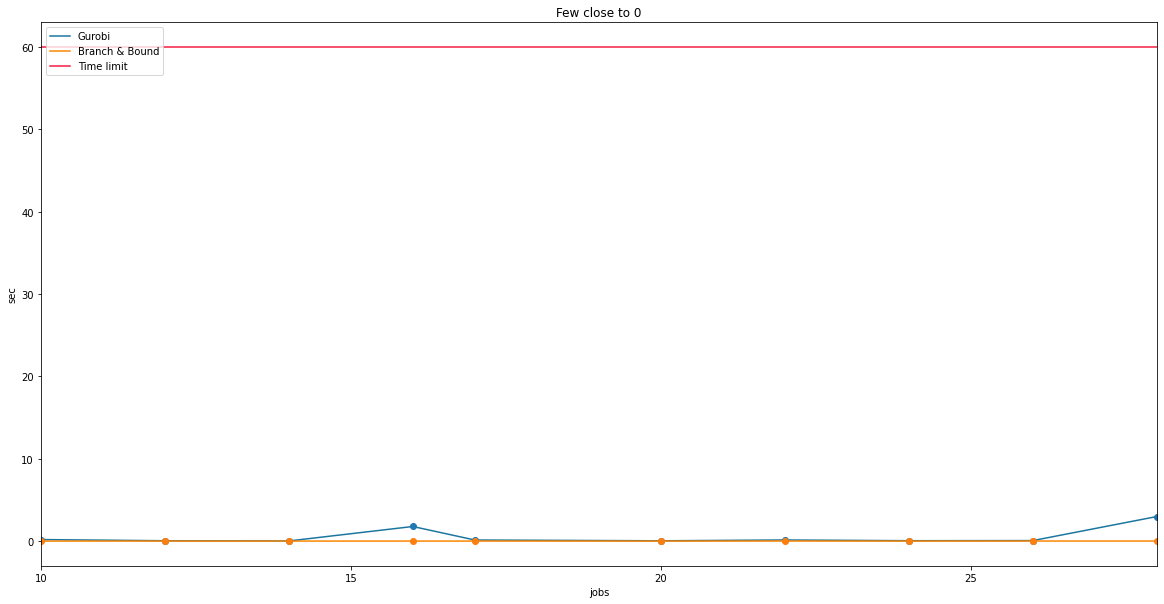

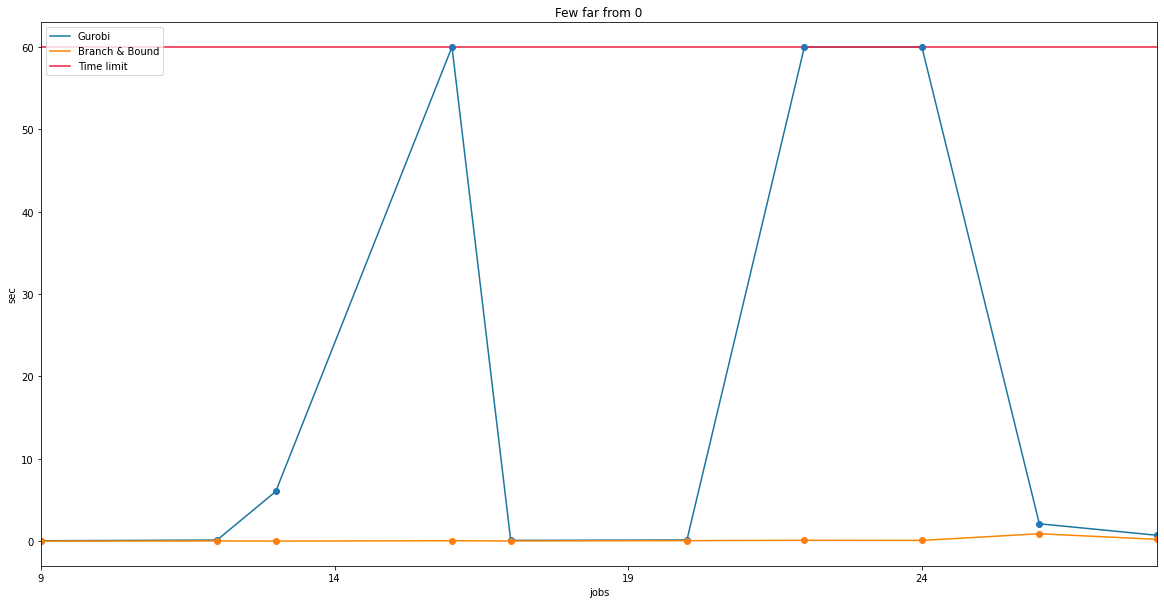

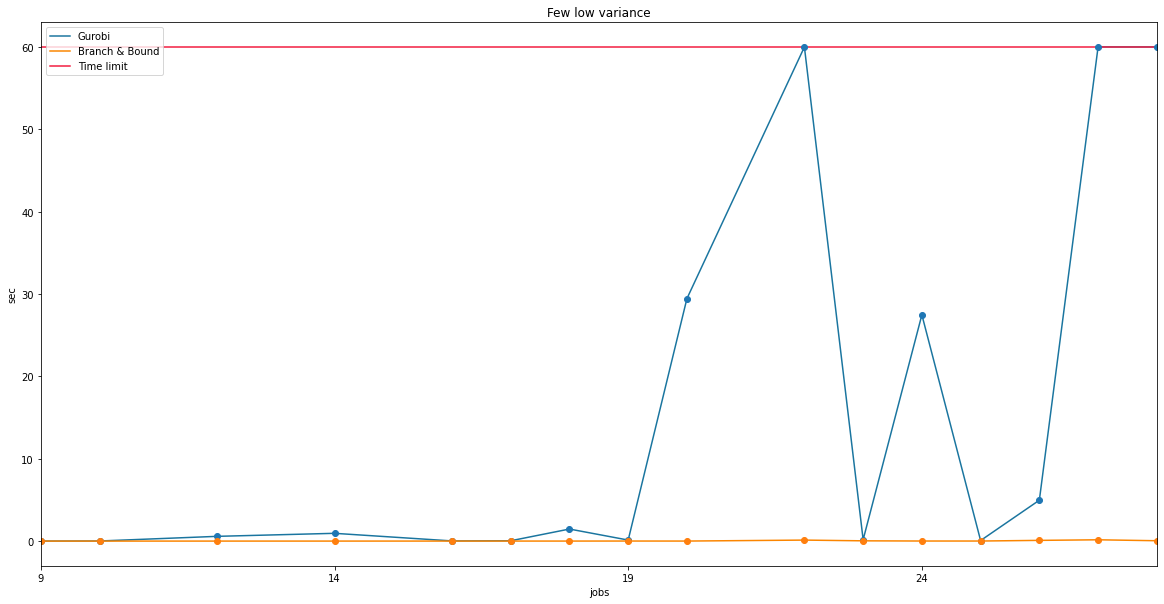

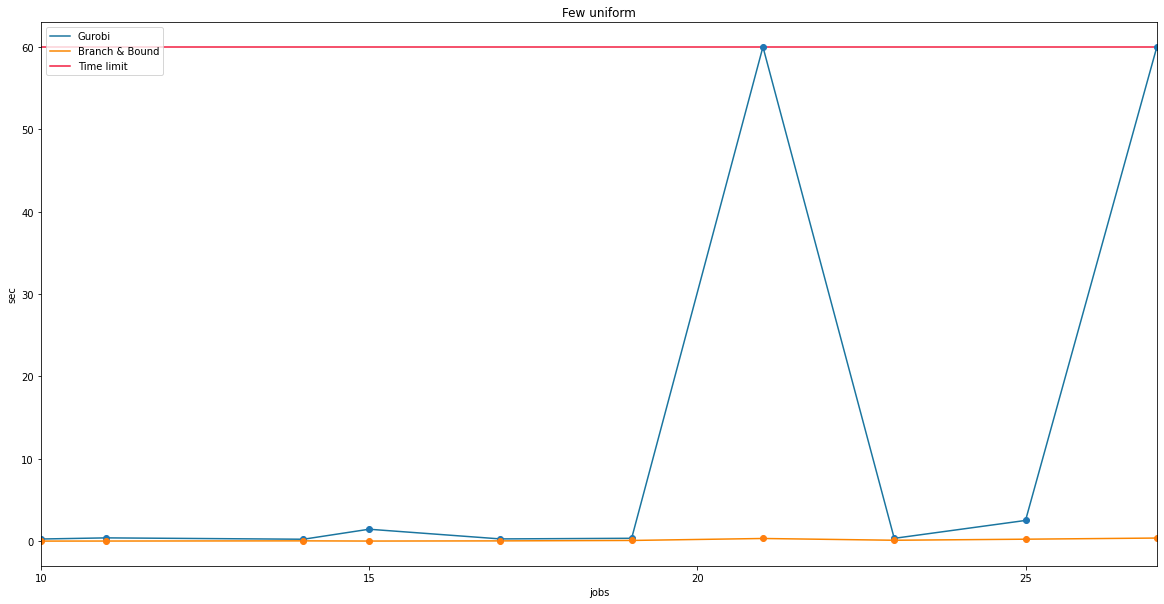

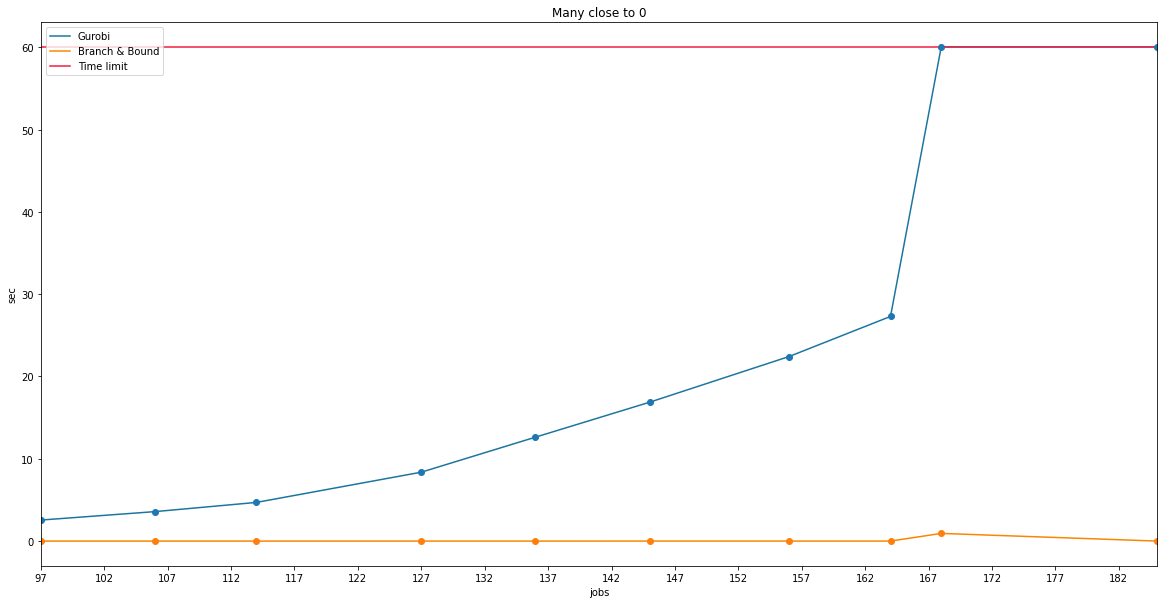

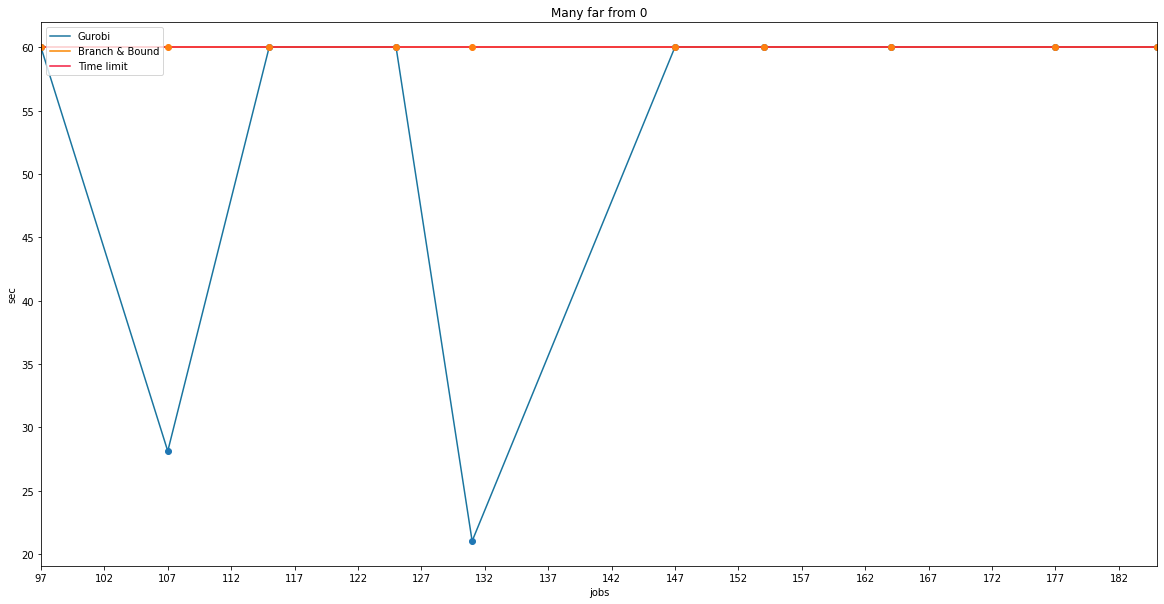

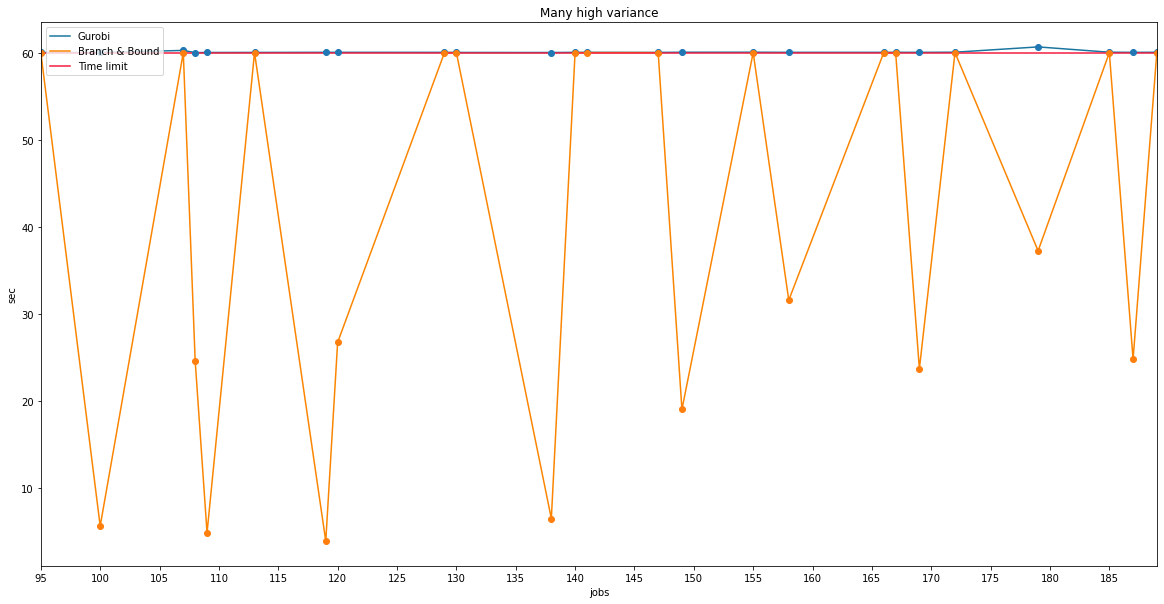

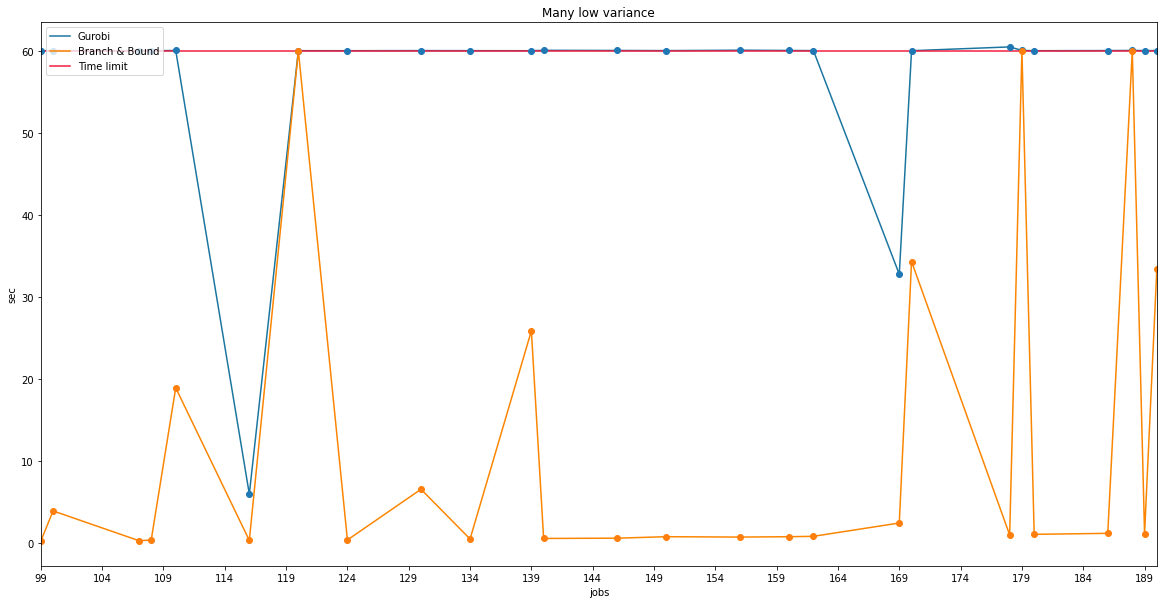

In [50]:
graficoTempo('Few close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20close%20to%20zero.csv')
graficoTempo('Few far from 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20far%20from%20zero.csv')
graficoTempo('Few low variance', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20low%20variance.csv')
graficoTempo('Few uniform', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20uniform.csv')
graficoTempo('Many close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20close%20to%20zero.csv')
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20far%20from%20zero.csv'
graficoTempo('Many far from 0',url)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20high%20variance.csv'
graficoTempo('Many high variance',url)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20low%20variance.csv'
graficoTempo('Many low variance',url)

In [51]:
def graficoValoreObj(title, fileURL):
  gurobiColor =  "#1a759f"
  bnbColor ="#fb8500"
  limitColor = "#f21b3f"
  intervals1 = []
  sample_means1 = []
  x = []
  y_diff = []
  url = fileURL

  df = pd.read_csv(url)
  df = df.sort_values(by=['jobs'])
  df.drop_duplicates(subset="jobs",keep='last', inplace=True)

  for i in df.index:
    x.append(df.loc[i,"jobs"])
    diff = df.loc[i,"gurobiSolution"] - df.loc[i,"bnbSolution"]
    y_diff.append(diff*(-1))
  
  # plotting graph
  fig, ax = plt.subplots(1,figsize=(20,10))
  #fig.suptitle('Vertically stacked subplots')

  ax.plot(x, y_diff, label = "Gurobi", color = gurobiColor)
  ax.errorbar(x, y_diff, fmt ='o')
  ax.set_title(title)
  ax.set_xlabel('jobs')
  ax.set_ylabel('value')
  ax.set_xlim(min(df['jobs']), max(df['jobs']))
  plt.xticks(range(min(df['jobs']), max(df['jobs']),5))

  plt.legend(loc="upper left")

  #ax.set_title('k = 64')

In [ ]:
graficoValoreObj('Few close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20close%20to%20zero.csv')
graficoValoreObj('Few far from 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20far%20from%20zero.csv')
graficoValoreObj('Few low variance', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20low%20variance.csv')
graficoValoreObj('Few uniform', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20uniform.csv')
graficoValoreObj('Many close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20close%20to%20zero.csv')
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20far%20from%20zero.csv'
graficoValoreObj('Many far from 0',url)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20high%20variance.csv'
graficoValoreObj('Many high variance',url)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20low%20variance.csv'
graficoValoreObj('Many low variance',url)

In [69]:
def graficoTempoMedio(title, fileURL, column):
  gurobiColor =  "#1a759f"
  bnbColor ="#fb8500"
  limitColor = "#f21b3f"
  intervals1 = []
  sample_means1 = []
  x = []
  y = []
  url = fileURL

  df = pd.read_csv(url)
  df = df.sort_values(by=['jobs'])
  df.drop_duplicates(subset="jobs",keep='last', inplace=True)

  for i in df.index:
    x.append(df.loc[i,"jobs"])
    y.append(df.loc[i,column])
    

  mean = np.mean(y)
  
  # plotting graph
  fig, ax = plt.subplots(1,figsize=(20,10))
  #fig.suptitle('Vertically stacked subplots')

  ax.plot(x, y, label = "Gurobi", color = gurobiColor)
  ax.errorbar(x, y, fmt ='o')
  ax.set_title(title)
  ax.set_xlabel('jobs')
  ax.set_ylabel('value')
  ax.set_xlim(min(df['jobs']), max(df['jobs']))
  plt.xticks(range(min(df['jobs']), max(df['jobs']),5))
  ax.axhline(y = mean, label='Mean time',color = limitColor)

  plt.legend(loc="upper left")

  #ax.set_title('k = 64')

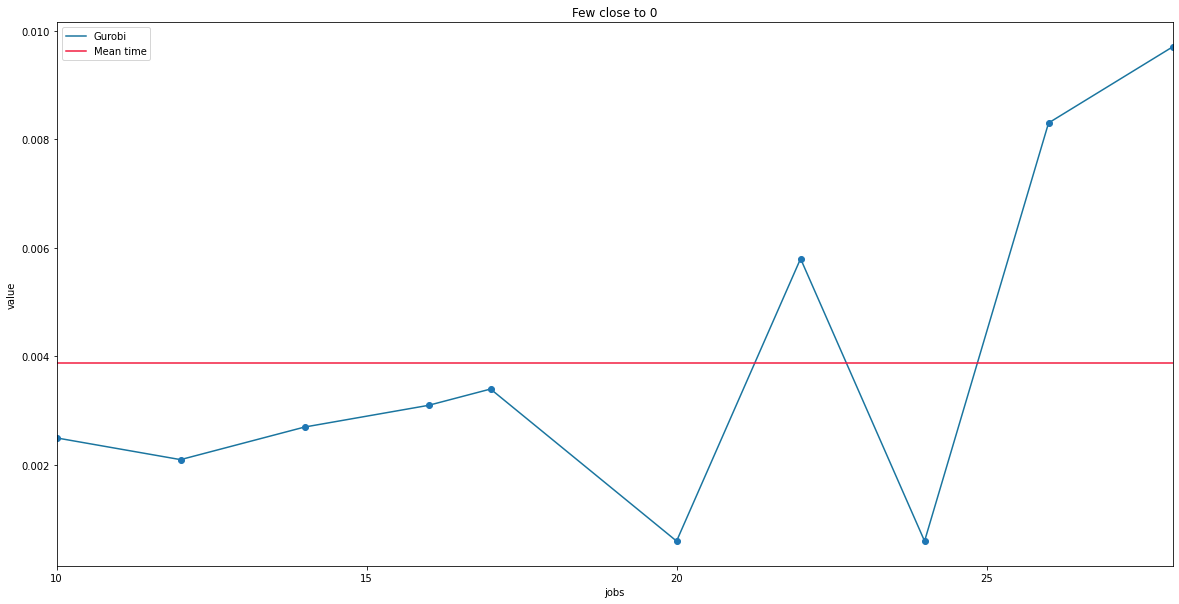

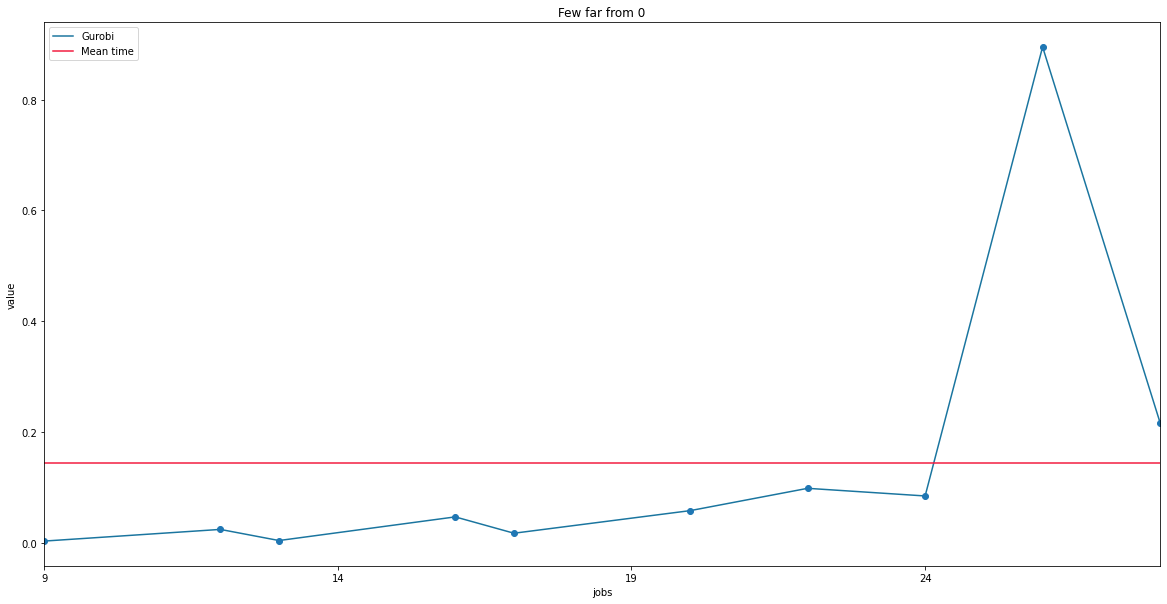

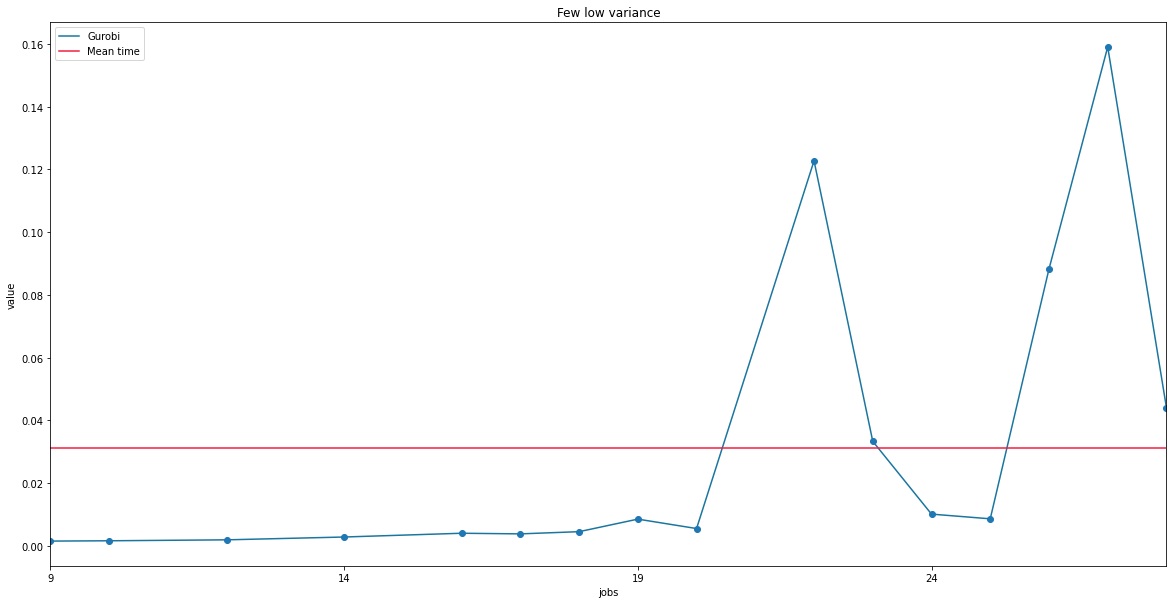

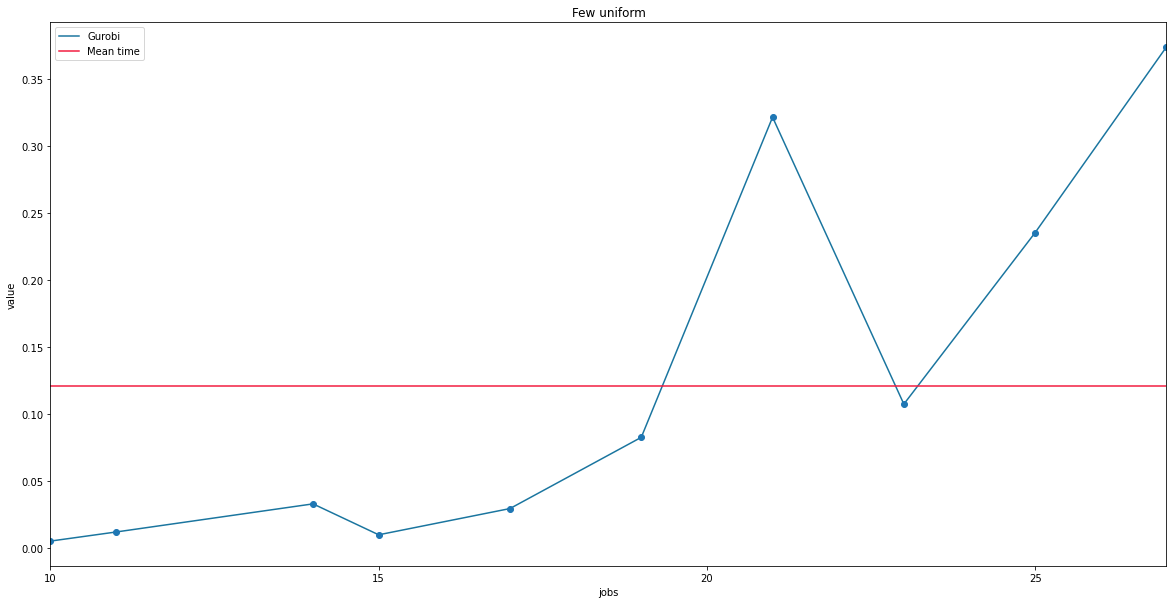

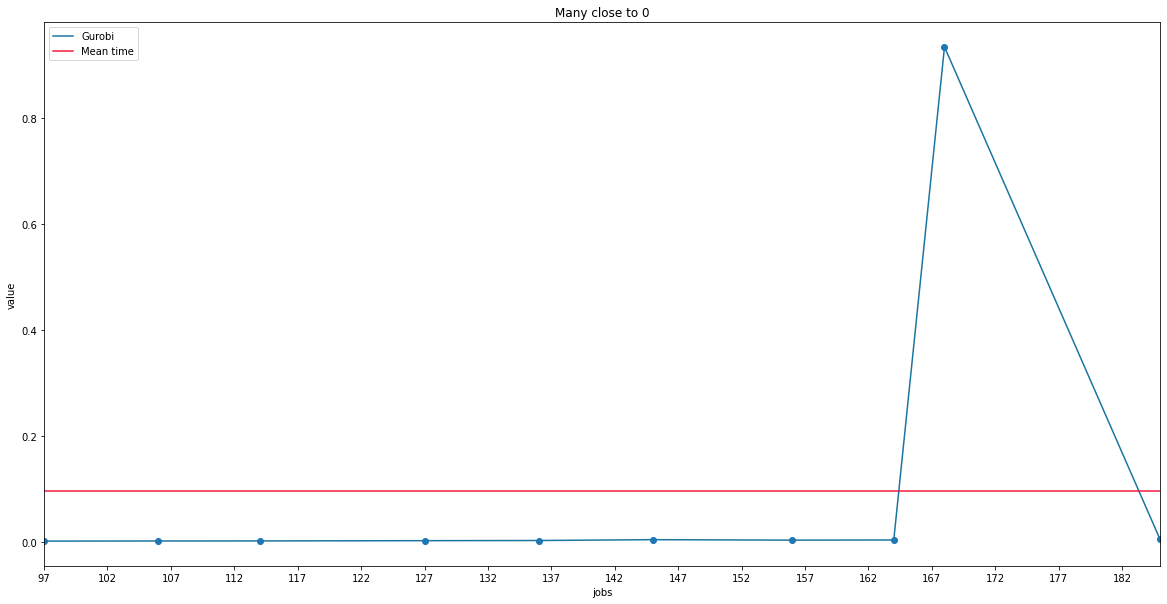

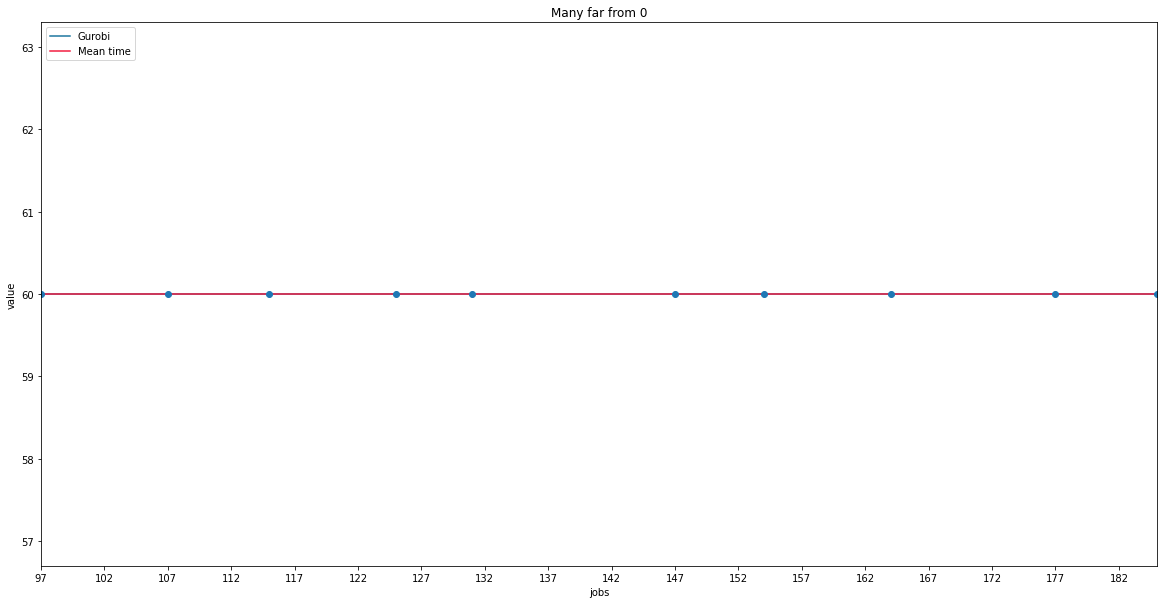

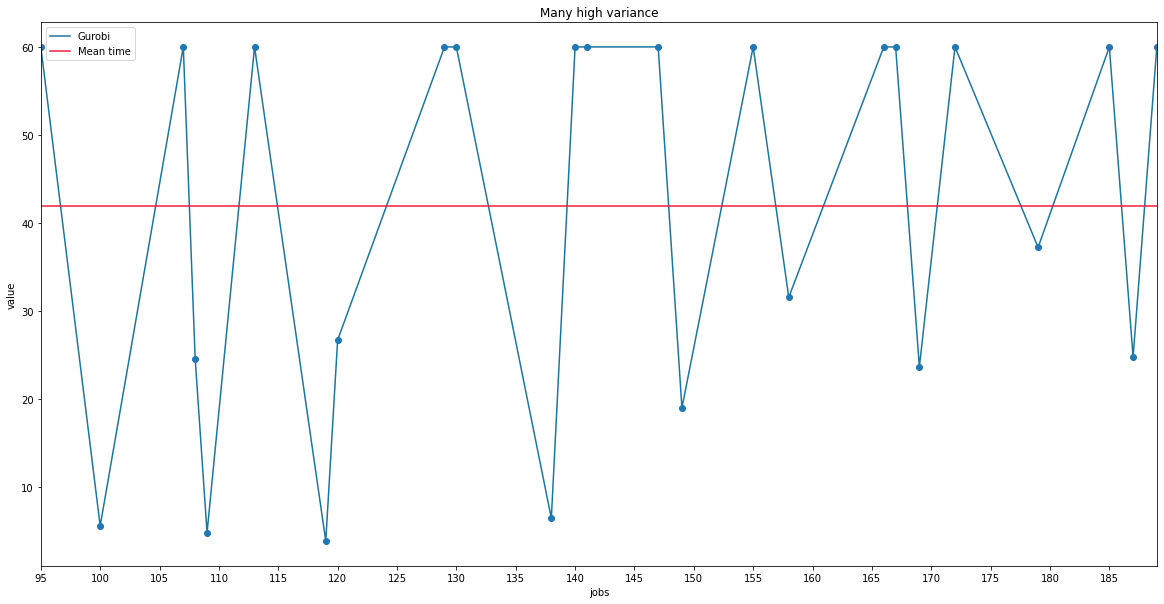

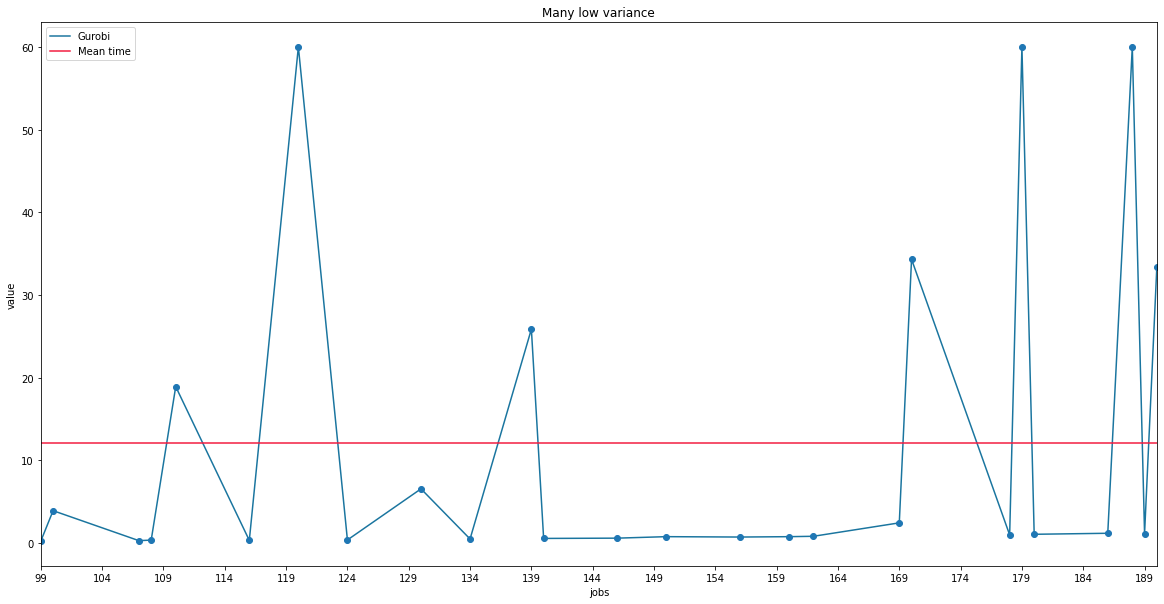

In [70]:
column = "bnbTime"
graficoTempoMedio('Few close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20close%20to%20zero.csv',column)
graficoTempoMedio('Few far from 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20far%20from%20zero.csv',column)
graficoTempoMedio('Few low variance', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20low%20variance.csv',column)
graficoTempoMedio('Few uniform', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/few%20uniform.csv',column)
graficoTempoMedio('Many close to 0', 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20close%20to%20zero.csv',column)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20far%20from%20zero.csv'
graficoTempoMedio('Many far from 0',url,column)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20high%20variance.csv'
graficoTempoMedio('Many high variance',url,column)
url = 'https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results/many%20low%20variance.csv'
graficoTempoMedio('Many low variance',url,column)